In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data=pd.read_csv('weatherHistory.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data.shape

(96453, 12)

In [6]:
data.isna().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [7]:
data=data.dropna()

In [8]:
modeling_data=data.copy()
modeling_data=modeling_data.drop(['Daily Summary','Loud Cover'], axis=1)
le = LabelEncoder()
modeling_data['Summary']=le.fit(modeling_data['Summary']).transform(modeling_data['Summary'])
le2 = LabelEncoder()
modeling_data['Precip Type']=le2.fit(modeling_data['Precip Type']).transform(modeling_data['Precip Type'])

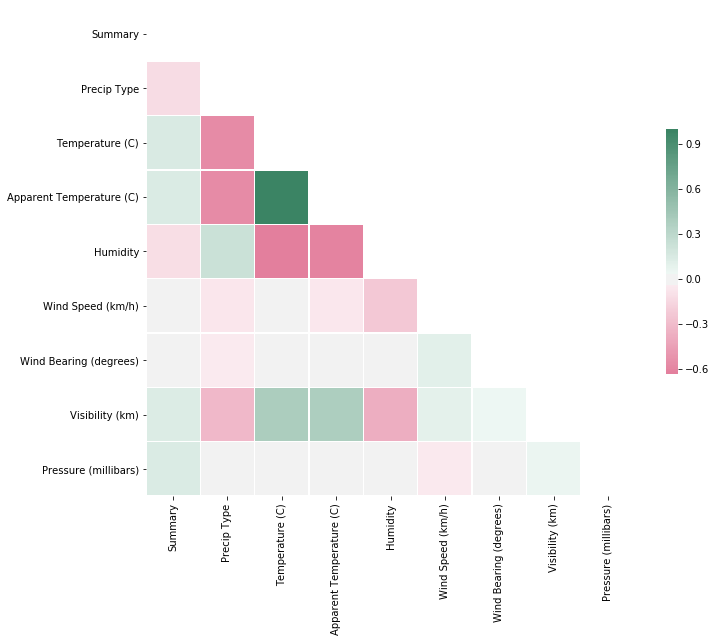

In [9]:
corr = modeling_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 150, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
modeling_data=modeling_data.drop(['Apparent Temperature (C)','Formatted Date','Summary',],axis=1)
modeling_data=modeling_data[modeling_data['Humidity']>0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split( modeling_data['Humidity'], 
                                                      modeling_data['Temperature (C)'], 
                                                      test_size=0.33, random_state=42)


In [12]:
reg = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg.fit(X_train.values.reshape(-1, 1),y_train.values.reshape(-1, 1))
reg.coef_

array([[-31.09051115]])

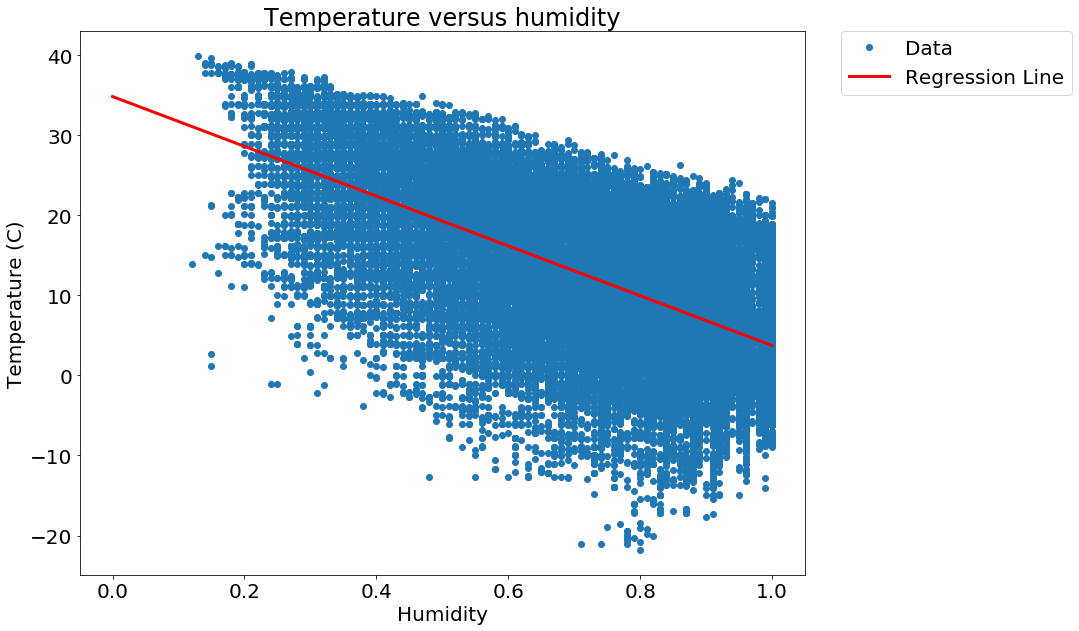

In [13]:
font = {'size'   : 20}
plt.rc('font', **font)
plt.figure(figsize=(13,10))
plt.plot(modeling_data['Humidity'],modeling_data['Temperature (C)'],'o',label='Data')
I=np.linspace(np.floor(min(modeling_data['Humidity'])*0.95),np.ceil(max(modeling_data['Humidity'])*0.11),50)
plt.plot(I,reg.predict(I.reshape(-1, 1)),color='r', linewidth=3,label='Regression Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Humidity');plt.ylabel('Temperature (C)')
Preds=reg.predict( modeling_data['Humidity'].values.reshape(-1, 1))
R2=r2_score(modeling_data['Temperature (C)'],Preds )
plt.title('Temperature versus humidity')
plt.show()

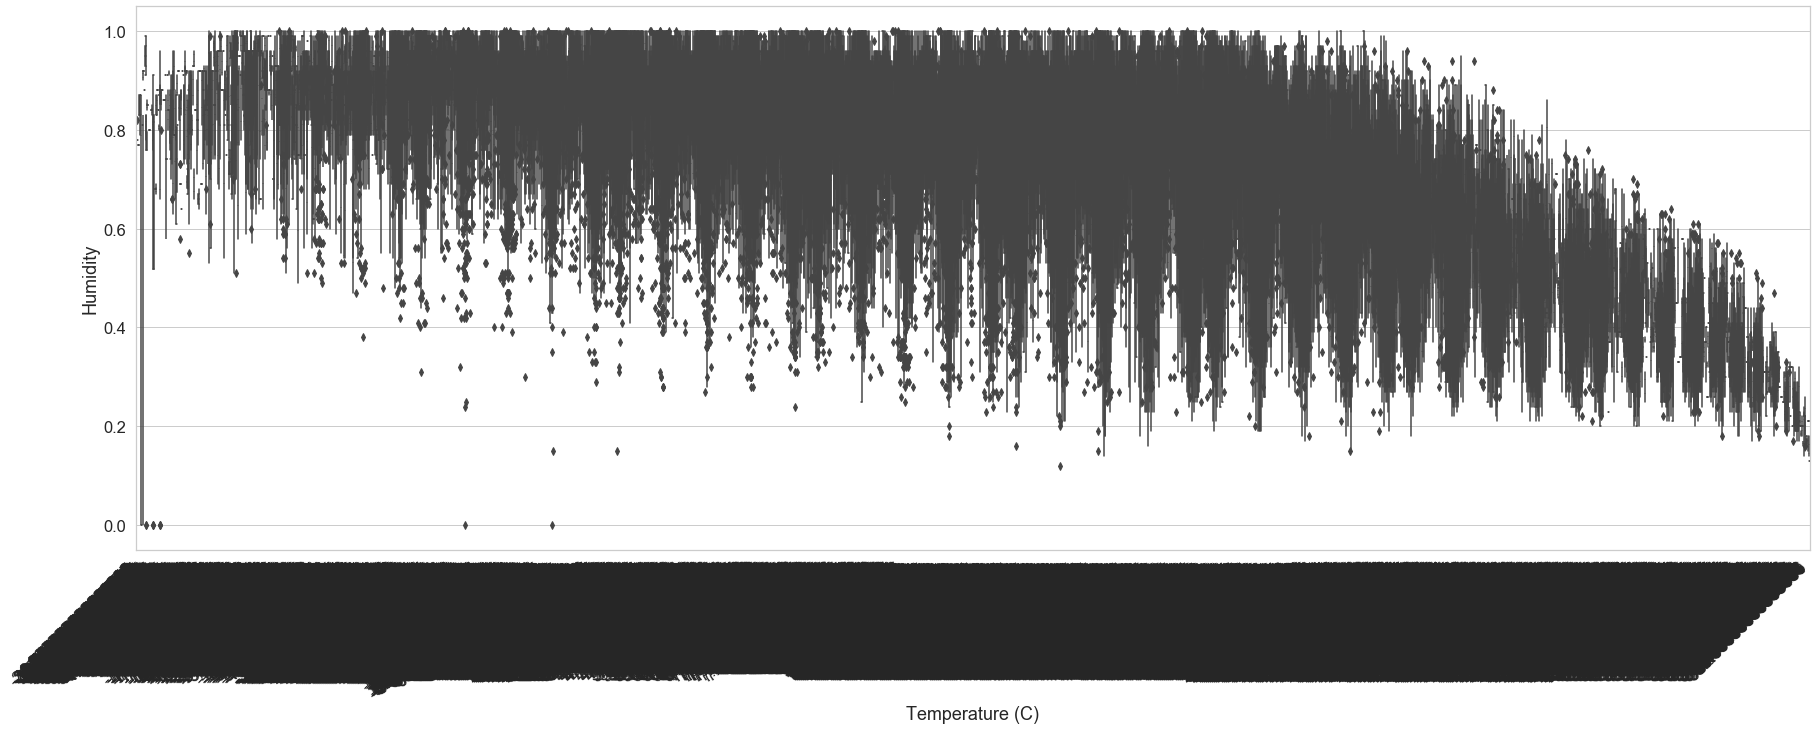

In [15]:
sns.set(rc={'figure.figsize':(30,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Temperature (C)",y="Humidity",data=data)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [ ]:
sns.set(rc={'figure.figsize':(30,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Temperature (C)",y="Humidity",data=data)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')